In [ ]:
!git clone https://github.com/tnivram/capstone_dataset.git

Cloning into 'capstone_dataset'...
remote: Enumerating objects: 3767, done.
remote: Counting objects: 100% (3767/3767), done.
remote: Compressing objects: 100% (3766/3766), done.
remote: Total 3767 (delta 0), reused 3767 (delta 0), pack-reused 0
Receiving objects: 100% (3767/3767), 18.68 MiB | 21.05 MiB/s, done.


In [ ]:
ROOT = '/content/capstone_dataset/sunda-dataset'

In [ ]:
import os

train_path = os.path.join(ROOT,'training')
val_path = os.path.join(ROOT,'validation')
test_path = os.path.join(ROOT,'test')

In [ ]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
plt.style.use('seaborn-v0_8')

### **Preview random training dataset**

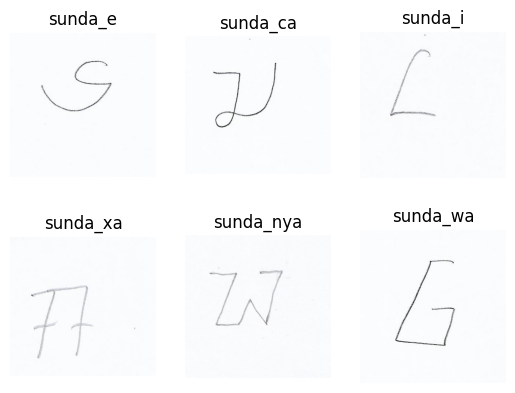

In [ ]:
index = random.randint(1,75)
rand_paths = random.sample(os.listdir(train_path), 6)

for i, rand_path in enumerate(rand_paths):
  rand_dir = os.path.join(train_path, rand_path)
  img_path = os.listdir(rand_dir)[index]
  img_dir = os.path.join(rand_dir, img_path)

  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.title(rand_path)
  img = mpimg.imread(img_dir)
  plt.imshow(img)

plt.show()

### **Image Augmentation**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = 150

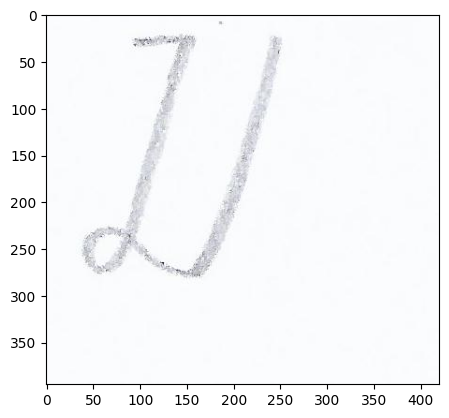

In [ ]:
# choose an image
imgg = mpimg.imread('/content/capstone_dataset/sunda-dataset/training/sunda_ca/ca_101.jpg')
plt.imshow(imgg)

In [ ]:
# function to randomly adjust contrast
def adjust_contrast(img):
  img_contrast = tf.image.random_contrast(img, lower=0, upper=5)
  return img_contrast

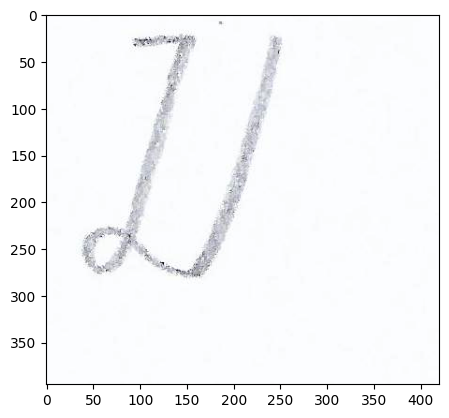

In [ ]:
# apply contrast test case
im = adjust_contrast(imgg,0,5)
plt.imshow(im)

In [ ]:
def generators(SOURCE_DIR, augment=True):
  if augment:
    datagen = ImageDataGenerator(
            rescale = 1./255,
            rotation_range = 15,
            zoom_range = 0.15,
            preprocessing_function = adjust_contrast
    )
  else:
    datagen = ImageDataGenerator(
            rescale = 1./255
    )

  generator = datagen.flow_from_directory(
      directory = SOURCE_DIR,
      batch_size = BATCH_SIZE,
      class_mode='categorical',
      #color_mode='grayscale',
      target_size=(TARGET_SIZE, TARGET_SIZE),
      shuffle = True
  )

  return generator

In [ ]:
train_ds = generators(train_path, augment=True)
val_ds = generators(val_path, augment=False)

Found 2558 images belonging to 30 classes.
Found 540 images belonging to 30 classes.


Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(30, activation = 'softmax'),
  ])


model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
EPOCHS = 25

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = EPOCHS,
    verbose = 1
)

Epoch 1/25
80/80 [==============================] - 100s 1s/step - loss: 3.3076 - accuracy: 0.0774 - val_loss: 3.1031 - val_accuracy: 0.1963
Epoch 2/25
80/80 [==============================] - 95s 1s/step - loss: 2.6122 - accuracy: 0.2651 - val_loss: 2.2090 - val_accuracy: 0.3685
Epoch 3/25
80/80 [==============================] - 94s 1s/step - loss: 2.0149 - accuracy: 0.4163 - val_loss: 1.6669 - val_accuracy: 0.5259
Epoch 4/25
80/80 [==============================] - 95s 1s/step - loss: 1.4815 - accuracy: 0.5625 - val_loss: 1.2943 - val_accuracy: 0.6111
Epoch 5/25
80/80 [==============================] - 98s 1s/step - loss: 1.1616 - accuracy: 0.6599 - val_loss: 1.0505 - val_accuracy: 0.6796
Epoch 6/25
80/80 [==============================] - 96s 1s/step - loss: 0.9627 - accuracy: 0.7138 - val_loss: 0.8709 - val_accuracy: 0.7444
Epoch 7/25
80/80 [==============================] - 96s 1s/step - loss: 0.7664 - accuracy: 0.7744 - val_loss: 0.7603 - val_accuracy: 0.7667
Epoch 8/25
80/80 [=

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

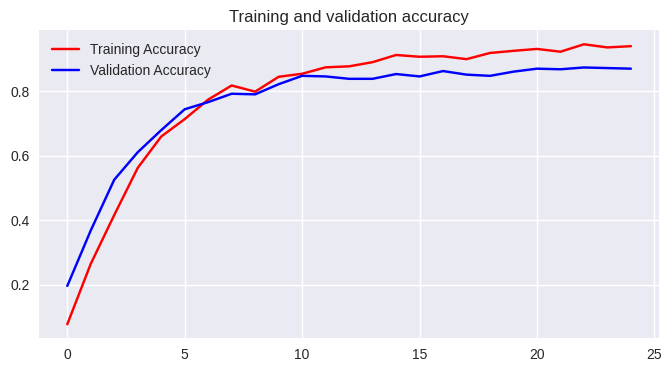

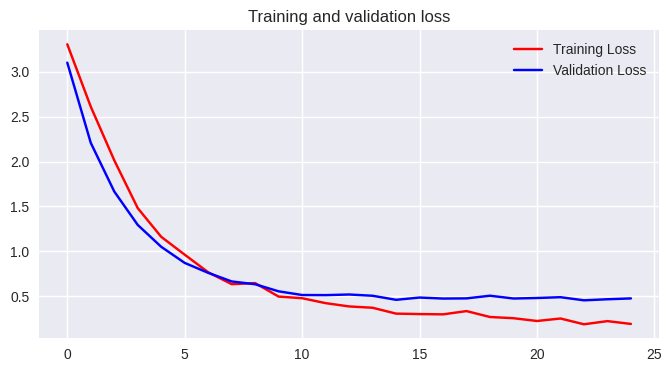

In [ ]:
# Plot the training and validation accuracies for each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
fig1 = plt.figure(figsize=(8, 4))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.title('Training and validation accuracy')
plt.savefig('fig1.png')

print("")
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
fig2 = plt.figure(figsize=(8, 4))
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(["Training Loss", "Validation Loss"])
plt.title('Training and validation loss')
plt.savefig('fig2.png')


In [ ]:
from google.colab import files

files.download('fig2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('model_sunda.keras')

In [ ]:
files.download('model_sunda.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('model_sunda.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('model_sunda.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_model = tf.keras.models.load_model('model_sunda.h5')